# Using ITK in Python Pipelines

### Learning Objectives

* Learn how to write simple Python code with ITK
* Become familiar with the Python and Object-oriented interfaces to ITK

# NumPy and scikit-learn interactions

* ITK is great at reading and processing images
* Some algorithms are not available in ITK
* NumPy is great at processing arrays in simple ways
* NumPy arrays can be read by many other Python packages
    * matplotlib
    * scikit-learn

In [1]:
import itk
from itkwidgets import view

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im=itk.imread("data/KitwareITK.jpg")
view(im)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageRGBUC2; pro…

In [16]:
arr=itk.array_from_image(im)
print(arr[1,1])

[51 56 60]


Let go the other way around: NumPy array to an ITK image. First, we create an array with some values.

In [17]:
def make_gaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, np.float32)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)


arr = make_gaussian(11)

Let's look at the array. We use matplotlib to do this.

(-0.5, 10.5, 10.5, -0.5)

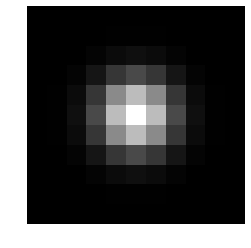

In [18]:
plt.gray()
plt.imshow(arr)
plt.axis('off')

In [20]:
im = itk.image_view_from_array(arr)
view(im,cmap='Grayscale')

Viewer(cmap='Grayscale', geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.i…

## Exercises

### Exercise 1: Visualize an image
* Read an image with ITK
* Apply a filter
* Show both original image and filtered images with matplotlib

In [4]:
im=itk.imread('data/CBCT-TextureInput.png', itk.F)

In [5]:
# %load solutions/4_ITK_and_NumPy_answers_Exercise1.py

# scikit-learn

* scikit-learn is a machine learning package in Python.
* It is used to illustrate solving a problem using ITK and NumPy arrays.

In [27]:
import sklearn

First, we load 10 2D-images of circles with different radii and center position to which some noise has been added, and their corresponding ground truth segmentations.

itkSize2 ([50, 50])


Text(0.5, 1.0, 'Segmentation')

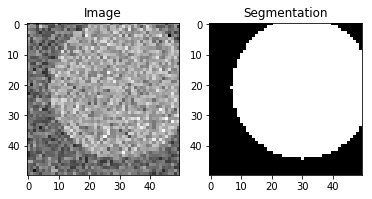

In [10]:
l_label=[]
l_im=[]

for i in range(0,10):
    imageName='data/sklearn/im%d.nrrd'%i
    im=itk.imread(imageName,itk.F)
    arr = itk.array_from_image(im)
    l_im.append(arr)
    
    labelName='data/sklearn/im%d_label.nrrd'%i
    im=itk.imread(labelName,itk.UC)
    arr = itk.array_from_image(im)
    l_label.append(arr)
    
size=itk.size(im)
print(size)

plt.subplot(1, 2, 1)
plt.imshow(l_im[0])
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(l_label[0])
plt.title("Segmentation")

The goal is to find the segmentation based on the input image.

We create arrays of data:
* X - the input samples
* Y - the target values

In [11]:
X0=l_im[0].flatten()
X=X0

Y=l_label[0].flatten()

for i in range(1,10):
    X=np.concatenate((X, l_im[i].flatten()))
    Y=np.concatenate((Y, l_label[i].flatten()))

* We use a supervised learning methods based on applying Bayes’ theorem.
* The only information provided to the algorithm is the image intensity value.

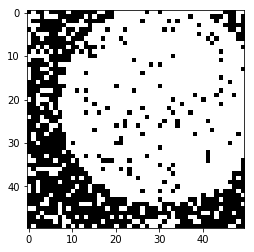

In [12]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X.reshape(-1,1), Y)

result=clf.predict(X0.reshape(-1,1)).reshape(size[0],size[1])
plt.imshow(result)

To improve our segmentation, we filter the input image with a median image filter and add this information as a second sample vector.

Text(0.5, 1.0, 'Median Filtered Image')

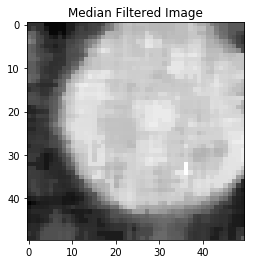

In [13]:
l_median=[]
for i in range(0,10):
    imageName='data/sklearn/im%d.nrrd'%i
    im=itk.imread(imageName,itk.F)
    
    median=itk.median_image_filter(im, radius=3)
    
    arr = itk.array_from_image(median)
    l_median.append(arr)
    
plt.gray()
plt.imshow(l_median[0])
plt.title("Median Filtered Image")

In [14]:
M0=l_median[0].flatten()
M=M0
X0=np.concatenate((X0.reshape(-1,1),M0.reshape(-1,1)), axis=1)
for i in range(1,10):
    M=np.concatenate((M, l_median[i].flatten()))

X = np.concatenate((X.reshape(-1,1),M.reshape(-1,1)), axis=1)

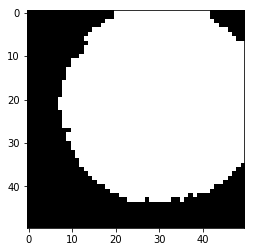

In [15]:
clf.fit(X, Y)
result=clf.predict(X0).reshape(50,50)
plt.imshow(result)

## Typical processing

* Image preprocessing
    * Bias field correction (n4_bias_field_correction_image_filter)
    * Noise reduction (smoothing_recursive_gaussian_image_filter)
    * Feature computation (Texture, Wavelet, Edge detector)
* Converting ITK data to NumPy and organizing the data as needed
* Train classifier
* Use classifier on new data
* Convert classifier result to ITK data
* Apply some post processing filters
    * Fill holes (binary_fillhole_image_filter)
    * Smoothing (median_image_filter)

## Two ways of using ITK in Python

* Pythonic way
 * Functional programming
 * More concise
 * Some functions and filters are not accessible this way
* Object oriented way
 * Full access to ITK

## Let's start the Pythonic way

In [2]:
image = itk.imread("data/CBCT-TextureInput.png", itk.ctype('float'))

In [3]:
filtered_image = itk.median_image_filter(image, radius = 3)

In [4]:
view(filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Pythonic exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `mean_image_filter`
* Replace filter with `otsu_threshold_image_filter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [5]:
# median_filtered_image = itk.median_image_filter(image, radius = XX)
# view(median_filtered_image)

In [ ]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_median.py

Uncomment and replace filter with `mean_image_filter`

In [7]:
# mean_filtered_image = itk.filter(image, radius = 5)
# view(mean_filtered_image)

In [15]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_mean.py

Uncomment and replace filter with `otsu_threshold_image_filter`

In [107]:
# otsu_filtered_image = itk.filter(image)
# view(otsu_filtered_image)

In [18]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_otsu.py

## Object oriented

* Two types of C++ ITK objects
 * Smart pointers (hint: most ITK objects are)
 * "Simple" objects
* Translates in two ways of creating objects in Python
 * `obj = itk.SmartPointerObjectType.New()` (use auto-completion to see if `New()` method exists)
 * `obj = itk.SimpleObjectType()`

## Filters with object oriented syntax

In [6]:
PixelType = itk.ctype('float')
image = itk.imread("data/CBCT-TextureInput.png", PixelType)

ImageType = itk.Image[PixelType, 2]
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(4)
median_filter.Update()
view(median_filter.GetOutput())

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Object exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `MeanImageFilter`
* Replace filter with `OtsuThresholdImageFilter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [26]:
# median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
# median_filter.SetInput(image)
# median_filter.SetRadius(XX)
# median_filter.Update()
# median_filtered_image = median_filter.GetOutput()
# view(median_filtered_image)

In [29]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_MedianFilter.py

Uncomment and edit to use `MeanImageFilter`

In [30]:
# mean_filter = itk.XX[ImageType, ImageType].New()
# mean_filter.SetInput(XX)
# mean_filter.SetRadius(XX)
# mean_filter.Update()
# mean_filtered_image = mean_filter.GetOutput()
# view(mean_filtered_image)

In [33]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_MeanFilter.py

Uncomment and replace filter with `OtsuThresholdImageFilter`

In [34]:
# InputImageType = itk.Image[itk.ctype('float'), 2]
# OutputImageType = itk.Image[itk.ctype('short'), 2]

# otsu_filter = itk.OtsuThresholdImageFilter[XX]
# XX

In [37]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_OtsuFilter.py

## ITK object summary
* Has `New()` method?
* Call `Update()` with filters!